# Scraping in Python

You'll remember that a library is a collection of recipes (functions) and other stuff that someone has created for a particular type of problem. 

For scraping there are a few useful libraries:

* The `scraperwiki` library is a collection of tools for solving scraping problems
* `lxml.html` is a library for converting to XML
* `cssselect` is a library for drilling into those XML objects
* `pandas` is a library for data analysis

Some libraries come pre-installed on Colab, while others need installing first. All libraries need importing. 

In the code block below I import a number of libraries. Two (`scraperwiki` and `cssselect`) aren't pre-installed in Colab so they each need an extra `!pip install` command followed by the name of the library to install it first.

In [ ]:
#import the libraries 
#scraperwiki is a library for scraping webpages - it needs installing first
!pip install scraperwiki
import scraperwiki
#lxml.html is used to convert it into xml (more structured)
import lxml.html
#cssselect is used to drill down into that and find data in tags - also needs installing
!pip install cssselect
import cssselect
#the pandas library which is used to work with data 
#it's common to call it 'pd' so you have to type less! That would look like:
import pandas as pd

## Using those library - and their functions

Once imported, we can use these libraries - or more specifically: we can use the **functions** in each library.

In Python, you tend to use a function by also including the name of the library it is from, and a period, e.g. the `scraperwiki` function `scrape` is used by writing `scraperwiki.scrape("http://bbc.co.uk")` (in this case it's being asked to scrape the BBC webpage).

Below are some examples of functions from our libraries being used, with the results being printed immediately after:

b'<!DOCTYPE html>\n<html lang="en-GB" class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news">\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="google-site-verification" content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI">\n    <link href="//static.bbc.co.uk" rel="preconnect" crossorigin>\n    <link href="//m.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//nav.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//ichef.bbci.co.uk" rel="preconnect" crossorigin>\n    <link rel="dns-prefetch" href="//mybbc.files.bbci.co.uk">\n    <link rel="dns-prefetch" href="//ssl.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//sa.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//ichef.bbci.co.uk">\n\n\n    <link rel="preload" as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styl
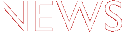

In [ ]:
#scrape the specified URL and store in a variable called 'scrapedpage'
scrapedpage = scraperwiki.scrape("https://www.bbc.co.uk/news") 
#print that variable - it's all the HTML on one line
print(scrapedpage)

So `scraperwiki.scrape()` is the `scrape()` function from the `scraperwiki` library. The *ingredient* we give to that function is the URL string `"https://www.bbc.co.uk/news"`.

The `scrape()` function basically fetches the whole webpage at a given address (the ingredient it's given).

The results of running that function are stored in a new variable called `scrapedpage` (you could call this anything).


In [ ]:
#convert the string of HTML text into a special type of variable that we can drill into
#we've called it 'root'
root = lxml.html.fromstring(scrapedpage)
#print 'root' - you'll see it doesn't print the HTML but an odd-looking 'Element'
print(root)

<Element html at 0x7f57e8f83410>


We then need another function to convert it to something we can *drill down into*. 

That function is the `fromstring()` function from the `lxml.html` library. The *ingredient* we give to that function is the `scrapedpage` variable we just created.

The results are stored in another new variable, `root`.


## Using CSS selectors to grab information from a webpage

The first two libraries that we imported are used very briefly: `scraperwiki` is used to fetch a webpage from a URL; and `lxml.html` is used to convert that long string of HTML into an 'object' with a structure that we can drill down into. 

We don't use them again. Most of the work in a scraper is done by just the next library: `cssselect`. And this will need more explanation.

First, let's put all the code from above into just one block, with the `print` commands removed, and start to add some lines using `cssselect`...

In [ ]:
#scrape the specified URL and store in a variable called 'scrapedpage'
scrapedpage = scraperwiki.scrape("https://www.bbc.co.uk/news") 
#convert the string of HTML text into a special type of variable that we can drill into
#we've called it 'root'
root = lxml.html.fromstring(scrapedpage)

#That 'element' can be drilled into now, though, using cssselect
#We specify the CSS selectors that describe the HTML tags we want from that page we scraped
h2s = root.cssselect('h2')
#print the variable we just created
print(h2s)
#print what type of variable it is using the 'type' function - it's a list
print(type(h2s))
#and print how many items there are in that list variable, using another function - len()
print(len(h2s))

[<Element h2 at 0x7f57e8f7fef0>, <Element h2 at 0x7f57e8f7fe30>, <Element h2 at 0x7f57e8f7fe90>, <Element h2 at 0x7f57e8f7ff50>, <Element h2 at 0x7f57e8f7ffb0>, <Element h2 at 0x7f57e8f94050>, <Element h2 at 0x7f57e8f940b0>, <Element h2 at 0x7f57e8f94110>, <Element h2 at 0x7f57e8f94170>, <Element h2 at 0x7f57e8f941d0>, <Element h2 at 0x7f57e8f94230>, <Element h2 at 0x7f57e8f94290>, <Element h2 at 0x7f57e8f942f0>, <Element h2 at 0x7f57e8f94350>]
<class 'list'>
14


The key line here is `h2s = root.cssselect('h2')`

Let's break that down. 

1. `h2s =` - creates a new variable called `h2s` which is going to be used to store whatever comes after that equals sign.
2. Then we come to `root` - that's the variable that was created in a previous line, when we converted our HTML webpage into a special object. This special object allows us to use...
3. ...the `cssselect` method (basically a function), which is joined to `root` with a period: `root.cssselect`
4. Finally, in parentheses after the `cssselect` method is the **selector(s)** that we want to target: `('h2')`

There's a lot going on there, but the key thing to remember is that *you don't need to change any of this code* apart from the selector in parentheses at the end. 

At the moment this selector is `'h2'` which means it will select any `<h2>` tags in the webpage that was scraped (in this case the BBC home page). But we'll go more into selectors in a moment.

Oh, and also in the output from the code we can see the results of the three `print` commands: 

* first, printing the variable `h2s` we can see that it's a bunch of 'elements' but they don't appear to be readable to us mere humans
* second, we confirm that by printing the results of using `type` on that variable
* third, printing the results of using the `len` function on that variable - or `len(h2s)` - tells us how many items are in that list: 14. 

## Using CSS selectors

**CSS selectors** are used to target different elements in a HTML page. A basic selector can target just one type of HTML tag, like `<h2>` or `<p>`, but you can also target a combination of tags (such as any `<strong>` tags within `<p>` tags). 

More complicated selectors can also be used to target tags based on their attributes (e.g. not just `<p>` but specifically `<p class="summary">`).

You can find lots of resources to help you with CSS selectors, such as [this one](https://www.w3schools.com/cssref/css_selectors.asp). Many will relate to styling webpages (which is how CSS selectors are most often used - selectors are used to target the HTML elements that you want to style), but the principles are the same.


## `cssselect` always produces a list - and the items always need decoding

It's worth pointing out that `cssselect` always generates a *list* - even if it finds one match, or even none. 

To work with those items we will need to either loop through them (as is often the case with lists), or access them by position (i.e. first, second, last, etc.)

We will then need to *decode* the particular item in the list that is being accessed. 

Let's start with the first part.

In [ ]:
#start looping through our list
for thing in h2s:
  #print each item
  print(thing)

<Element h2 at 0x7f57e8f7fef0>
<Element h2 at 0x7f57e8f7fe30>
<Element h2 at 0x7f57e8f7fe90>
<Element h2 at 0x7f57e8f7ff50>
<Element h2 at 0x7f57e8f7ffb0>
<Element h2 at 0x7f57e8f94050>
<Element h2 at 0x7f57e8f940b0>
<Element h2 at 0x7f57e8f94110>
<Element h2 at 0x7f57e8f94170>
<Element h2 at 0x7f57e8f941d0>
<Element h2 at 0x7f57e8f94230>
<Element h2 at 0x7f57e8f94290>
<Element h2 at 0x7f57e8f942f0>
<Element h2 at 0x7f57e8f94350>


As you can see, each element is slightly different, although not any more intelligible. 

We can also access them like this:

In [ ]:
#print the last item in the list
print(h2s[-1])

<Element h2 at 0x7f57e8f94350>


## Converting selected HTML into text

Once we loop through the items, or access them individually, we need to convert them into the text or HTML in the original webpage. For example we can add this to extract all text between the tag and its closing tag (that is, between `<h2>` and `</h2>`:

* `.text_content()`

Here's what that code would look like (don't forget the parentheses):


In [ ]:
h2text1 = h2s[0].text_content()
print(h2text1)

Accessibility links


And here's that incorporated into a list:


In [ ]:
#loop through the h2s list and call each item 'h2'
for h2 in h2s:
  #extract the text from that item, save in a variable called 'h2text'
  h2text = h2.text_content()
  #and print it
  print(h2text)

Accessibility links
News Navigation
BreakingBreaking news
Top Stories
Must See
Most watched
Full Story
Long reads
Most read
Around the BBC
Sport
Find us here
News Navigation
Explore the BBC


## Saving the information we've grabbed.

Now we've grabbed some information we can extend the code further to save it.

At this point we need to use functions from another library: `pandas`. This is a library for data storage and analysis. 

First, we use the function `DataFrame()` which creates a pandas dataframe. As ingredients it needs to know the names of any columns.

You will see below that we add a line *before* the loop which uses that to create an empty dataframe to store the data in.

Then, inside the loop, the data we extract is added to the dataframe.

Here's the code first - then I'll explain the new bits after.


In [ ]:
#Create a dataframe to store the data we are about to scrape
#It has one column called 'title'
#We call this dataframe 'df'
df = pandas.DataFrame(columns=["heading"])

#Scrape the html at this url
html = scraperwiki.scrape("https://www.bbc.co.uk/news")
# turn our HTML into an lxml object
root = lxml.html.fromstring(html) 
#grab anything inside a <h2> tag
h2s = root.cssselect('h2')
#loop through the h2s list and call each item 'h2'
for h2 in h2s:
  #extract the text from that item, save in a variable called 'h2text'
  h2text = h2.text_content()
  #and print it
  print(h2text)
  df = df.append({
  "heading" : h2text
  }, ignore_index=True)

print(df)

Accessibility links
News Navigation
BreakingBreaking news
Top Stories
Must See
Most watched
Full Story
Long Reads
Most read
Around the BBC
Sport
Find us here
News Navigation
Explore the BBC
                  heading
0     Accessibility links
1         News Navigation
2   BreakingBreaking news
3             Top Stories
4                Must See
5            Most watched
6              Full Story
7              Long Reads
8               Most read
9          Around the BBC
10                  Sport
11           Find us here
12        News Navigation
13        Explore the BBC


## The new code

The first line of new code is this:

`df = pandas.DataFrame(columns=["heading"])`

We are creating a new variable here, called `df`, and assigning to it the results of using a function: `pandas.DataFrame()` (the `pandas` function `DataFrame`).

That takes an ingredient which specifies the columns as being a list (note the square brackets) of one string: `"heading"`.

The second line of new code is this:

```
df = df.append({
      "heading" : h2text
      }, ignore_index=True)
```

This takes the `df` variable and updates it. 

On the right of the equals sign is `df.append()` - this means it is using a function called `append` to append (add) new data to the `df` variable it's attached to.

The `append` function [can include various ingredients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html): firstly the data that you want to append to the dataframe; but also settings, such as whether you want something called `ignore_index` to be `True` or `False`. Setting this to `True` just avoids problems when your data isn't unique.

What about the data that you are appending? Well, this has to be in the form of a **dictionary**. A dictionary is like a list, but with two key differences: firstly that it uses curly brackets instead of square ones: `{}`, and secondly it's a list of *pairs*: a 'key', and a 'value', separated by a colon.

Here's the dictionary in our code:

`{"heading" : h2text}`

The first part, `"heading"` is the **key**. This matches the column heading in the empty data frame. Note that it's a **string**: a label, basically.

The second part, `h2text`, is the **value**. This isn't in quotes so it's not a string - it's a variable. A few lines earlier we created this variable with `h2text = h2.text_content()`

So having extracted that information and stored it in `h2text`, the line of code is storing it in a dataframe with the label (key) "heading":

```
df = df.append({
      "heading" : h2text
      }, ignore_index=True)
```

We can print the dataframe to see what's in there:


In [ ]:
#Once the loop has finished we can take a look at the data
print(df)

                  heading
0     Accessibility links
1         News Navigation
2   BreakingBreaking news
3             Top Stories
4                Must See
5            Most watched
6              Full Story
7              Long Reads
8               Most read
9          Around the BBC
10                  Sport
11           Find us here
12        News Navigation
13        Explore the BBC


## Exporting the data

The `pandas` library has another function for exporting data: `to_csv()`.

It needs to be attached to the name of the dataframe variable with a period, then, in the brackets, you specify the name of the file you want to export it as. Make sure this ends in '.csv' so it can be used in a spreadsheet.

In [ ]:
#And we can export it
df.to_csv("scrapeddata.csv")

## Downloading the data

Once exported, it should appear in the file explorer in Google Colab on the left hand side. Click on the folder icon to open this up and you should see the file you just created (there's a refresh button above if you can't).

Hover over the file name to see three dots, then click on those to select **Download** and download to your computer.

## How to adapt it

You can use most of this code without having to change it. All you *need* to change is the lines specifying the base URL, and the list of words to add to it.

And this line, which specifies what you want to scrape from that page:

`titles = root.cssselect('h2')`

If you're scraping one type of information from one page, that will be enough. 

For the CSS selector you will need to identify the HTML in the page you are scraping, and the combination of tags that is being used. 

Some [reading around CSS selectors](https://www.w3schools.com/cssref/css_selectors.asp) will help you here, but a couple of useful things to know include:

* A period `.` means `class="`
* A hash `#` means `id="`

So `'div.title a'` means `<div class="title"><a ...>` - or, in other words, anything on the page inside an `<a>` tag (a link) within a `<div class="title">` tag.

The words used for variables (like "root" and "h2s" above) may not be relevant to what you are scraping - but that doesn't matter, because those words are arbitrary. If you do decide to change them, make sure you change them *throughout* the code, or it will create an error.


## Generating URLs for a scraper to loop through

Alternatively you might *generate* the URLs: for example, if they end in a number that goes up by 1 each time you can use `range` to generate that list of numbers and add them to the URL using `+`.

However, you cannot mix numbers and strings, so you need to convert the numbers to a string as you do this. Here's an example:

In [ ]:
#Create the basic URL that appears before the number
baseurl = "http://mypage.com?page="
#Create a list of numbers to put on the end
pagenums = range(1,11)
#Now generate the URLs by looping through the list and adding it to the URL
for i in pagenums:
  #Combine the two - 
  #this will generate an error because we are trying to combine a string and a number
  fullurl = baseurl+i

TypeError: ignored

## Tip: converting numbers into strings

You can see the error `must be str, not int` - in other words the second part must be a string not an integer.

To fix that you can use the `str()` function, which will convert a number into a string.

In [ ]:
#Create the basic URL that appears before the number
baseurl = "http://mypage.com?page="
#Create a list of numbers to put on the end
pagenums = range(1,11)
#Now generate the URLs by looping through the list and adding it to the URL
for i in pagenums:
  #Convert i to a string
  i = str(i)
  #Combine the two
  fullurl = baseurl+i
  #print it
  print(fullurl)

http://mypage.com?page=1
http://mypage.com?page=2
http://mypage.com?page=3
http://mypage.com?page=4
http://mypage.com?page=5
http://mypage.com?page=6
http://mypage.com?page=7
http://mypage.com?page=8
http://mypage.com?page=9
http://mypage.com?page=10
